**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [19]:
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.api import abline_plot
import pylab as pl
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

<Container object of 3 artists>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


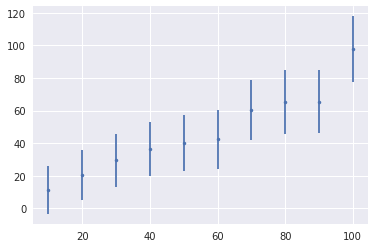

In [21]:
np.random.seed(99)
sns.set_style('darkgrid')
X = np.linspace(10,100,10)
Y = line(0.8,X,b=0,errors=errors)
# plt.scatter(X,Y)
plt.errorbar(X,Y,yerr=errors(y),fmt='.')


# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [22]:
print(X)
print(Y)
print(sm.add_constant(X))

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
[ 11.21388959  20.49946246  29.46261479  36.51840135  40.00459332
  42.31992195  60.28735811  65.18876141  65.41943485  97.59628989]
[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [24]:
mod_wrong = sm.OLS(Y,X).fit()
print(mod_wrong.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     599.3
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.52e-09
Time:                        12:26:37   Log-Likelihood:                -32.778
No. Observations:                  10   AIC:                             67.56
Df Residuals:                       9   BIC:                             67.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8439      0.034     24.480      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [25]:
X_con = sm.add_constant(X)
smfit = sm.OLS(Y, X_con).fit()
print(smfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     108.7
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           6.20e-06
Time:                        12:26:45   Log-Likelihood:                -32.668
No. Observations:                  10   AIC:                             69.34
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0466      4.847      0.422      0.6

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### The R-square in the wrong model is even higher?

# 4. plot the data (as points) and both statsmodels fits

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


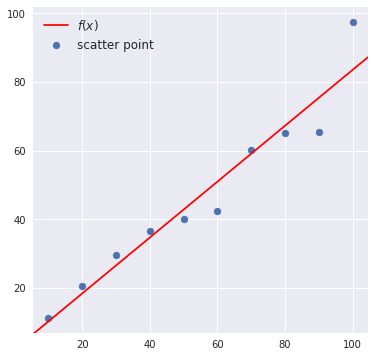

In [6]:
figure, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y,label='scatter point')
abline_plot(model_results=smfit, ax=ax, color='red',label='$f(x)$')
plt.legend(fontsize=12)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

<Container object of 3 artists>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


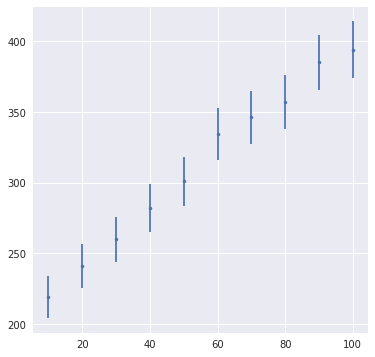

In [27]:
figure, ax = plt.subplots(figsize=(6,6))
Y = line(2,X,b=200,errors=errors)
plt.errorbar(X,Y,yerr=errors(Y),fmt='.')

# ax.scatter(X,Y,label='scatter point')
# mod = sm.OLS(Y,X_con).fit()
# abline_plot(model_results=mod, ax=ax, color='red',label='$f(x)$')
# plt.legend(fontsize=12)

# 6. repeat step 3

In [30]:
X_con = sm.add_constant(X)
smfitDoneWrong = sm.OLS(Y,X).fit()
smfitDoneRight = sm.OLS(Y, X_con).fit()
print(smfitDoneWrong.summary())
print(smfitDoneRight.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     94.17
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.59e-06
Time:                        12:38:07   Log-Likelihood:                -59.592
No. Observations:                  10   AIC:                             121.2
Df Residuals:                       9   BIC:                             121.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.8858      0.503      9.704      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### For this time, the right model has higher value of R-Square. I think this is caused by the large intercept and the model contains constant is able to explain it better.

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [32]:
weight = errors(Y)
smfmodel = sm.WLS(Y,X_con, weights=list(1/errors(Y))).fit()
print(smfmodel.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            WLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     993.2
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.12e-09
Time:                        12:39:31   Log-Likelihood:                -30.670
No. Observations:                  10   AIC:                             65.34
Df Residuals:                       8   BIC:                             65.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        201.6476      3.798     53.093      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

In [33]:
x = X
y = Y

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


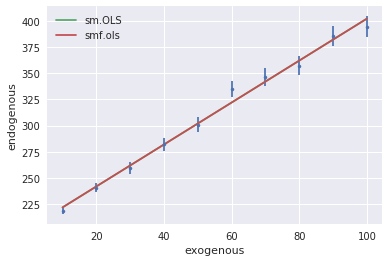

In [34]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();